# Aula 1 - Introdução ao Keras
O objetivo desta aula é desenvolver uma Rede Neural simples com o Keras, mais especificamente uma Multi Layer Perceptron, para classificação. A rede terá 4 entradas, uma camada escondida e 3 saídas, como ilustrado abaixo. (Obs: na imagem abaixo, o Bias não está ilustrado, mas ele existe e não podemos esquecer dele)

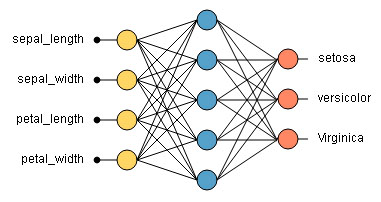

O dataset utilizado será o [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set). Este dataset possui 4 features (características relevantes dos dados):
- Comprimento das sépalas
- Largura das sépalas
- Comprimento das pétalas
- Largura das pétalas

O o nosso objetivo é, a partir destas informações, classificar o tipo da flor. As possíveis calssificações são:
- Setosa
- Virginica
- Versicolor

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## 1) Carregar o dataset

In [2]:
from sklearn import datasets
iris_dataset = datasets.load_iris() #retorna um dicionátio com os dados

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print('As features (entradas) são: {}'.format(iris_dataset['feature_names']))
print('Os targets (saídas) são: {}'.format(iris_dataset['target_names']))

As features (entradas) são: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Os targets (saídas) são: ['setosa' 'versicolor' 'virginica']


In [5]:
iris_dataset.data[:5]
#['sepal length', 'sepal width', 'petal length', 'petal width']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
iris_dataset.target
# 0 -> 'setosa'
# 1 -> 'versicolor'
# 2 -> 'virginica'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X = iris_dataset.data
y = iris_dataset.target

## 2) Preparar os dados para o modelo

Para preparar os dados, vamos normalizá-los e dividí-los em treino e validação.

In [8]:
import numpy as np
np.random.seed(42) # Para reprodutibilidade

Primeiro, vamos passar o array `y` para a forma:
- `[1,0,0]` caso `y=0`
- `[0,1,0]` caso `y=1`
- `[0,0,1]` caso `y=2`

In [9]:
# Lição de casa: Refaça esta função de uma maneira mais eficiente

y_vetorized = []
for target in y:
    if target == 0:
        y_vetorized.append([1,0,0])
    elif target == 1:
        y_vetorized.append([0,1,0])
    elif target == 2:
        y_vetorized.append([0,0,1])
        
y_vetorized = np.array(y_vetorized)
y_vetorized[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

### Normalizar
Dados variam de 0 a 1, ou -1 a 1. Isto acelera o treinamento do modelo.

In [10]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
m_max = np.max(X, axis = 0)
m_min = np.min(X, axis = 0)

print('O valor máximo de cada feature é: {}'.format(m_max))
print('O valor mínimo de cada feature é: {}'.format(m_min))

O valor máximo de cada feature é: [7.9 4.4 6.9 2.5]
O valor mínimo de cada feature é: [4.3 2.  1.  0.1]


In [12]:
X_norm = ((X-m_min)/(m_max-m_min))
X_norm[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

### Dividir os dados em treino e validação
Vamos dividir em 80% para treino e 20% para teste. Validação é importante para identificar quando o modelo está enviezando nos dados de treino. Vamos manter a mesma distribuição de classes nos datasets de treino e validação.

In [13]:
indices_setosa = np.random.permutation(50)
indices_versicolor = np.random.permutation(50) + 50
indices_virginica = np.random.permutation(50) + 100

In [14]:
split_ponit = int(0.8 * 50)
split_ponit

40

In [15]:
train_indices = np.concatenate((indices_setosa[:split_ponit], indices_versicolor[:split_ponit], indices_virginica[:split_ponit]))
val_indices = np.concatenate((indices_setosa[split_ponit:], indices_versicolor[split_ponit:], indices_virginica[split_ponit:]))

In [16]:
#random.shuffle(train_indices)
#random.shuffle(val_indices)

In [17]:
X_train = X_norm[train_indices]
y_train = y_vetorized[train_indices]
X_val = X_norm[val_indices]
y_val = y_vetorized[val_indices]

In [18]:
print('Formato do array X_train: {}'.format(X_train.shape))
print('Formato do array y_train: {}'.format(y_train.shape))
print('Formato do array X_val: {}'.format(X_val.shape))
print('Formato do array y_val: {}'.format(y_val.shape))

Formato do array X_train: (120, 4)
Formato do array y_train: (120, 3)
Formato do array X_val: (30, 4)
Formato do array y_val: (30, 3)


## 3) Construindo o modelo
Documentação da camada [Dense](https://keras.io/layers/core/)

Obs: Aumentar o número de camadas e neurônios nem sempre é a melhor solução para uma melhoria de performance/acurácia.

In [19]:
import tensorflow as tf
tf.__version__

'2.0.0-alpha0'

In [20]:
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

from tensorflow.keras.optimizers import Adam

In [21]:
def Rede_Neural_Simples(num_entradas, num_saidas):
    data_input  = Input(shape=(num_entradas,)
                    , name='data_input')

    first_hidden_layer = Dense(20, activation='sigmoid')(data_input)

    target = Dense(num_saidas, name='sigmoid')(first_hidden_layer)
    
    seq = Model(inputs=data_input, outputs=target, name='Rede_Neural_Simples')

    return seq

In [22]:
model = Rede_Neural_Simples(4, 3)

In [23]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [24]:
model.summary()

Model: "Rede_Neural_Simples"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data_input (InputLayer)      [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 20)                100       
_________________________________________________________________
sigmoid (Dense)              (None, 3)                 63        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


## 4) Treinando o modelo

Documentação do `.fit()` pode ser encontrada [aqui](https://keras.io/models/sequential/)

In [25]:
history = model.fit(
    x = X_train, y = y_train
    , batch_size=16
    , epochs=260
    , verbose=1
    , validation_data=(X_val, y_val)
    , shuffle=True
    , initial_epoch=0
)

Train on 120 samples, validate on 30 samples
Epoch 1/260
120/120 [==============================] - 0s 2ms/sample - loss: 0.6093 - accuracy: 0.3333 - val_loss: 0.6013 - val_accuracy: 0.3333
Epoch 2/260
120/120 [==============================] - 0s 142us/sample - loss: 0.5977 - accuracy: 0.3333 - val_loss: 0.5900 - val_accuracy: 0.3333
Epoch 3/260
120/120 [==============================] - 0s 142us/sample - loss: 0.5867 - accuracy: 0.3333 - val_loss: 0.5789 - val_accuracy: 0.3333
Epoch 4/260
120/120 [==============================] - 0s 150us/sample - loss: 0.5754 - accuracy: 0.3333 - val_loss: 0.5683 - val_accuracy: 0.3333
Epoch 5/260
120/120 [==============================] - 0s 158us/sample - loss: 0.5650 - accuracy: 0.3333 - val_loss: 0.5577 - val_accuracy: 0.3333
Epoch 6/260
120/120 [==============================] - 0s 150us/sample - loss: 0.5544 - accuracy: 0.3333 - val_loss: 0.5474 - val_accuracy: 0.3333
Epoch 7/260
120/120 [==============================] - 0s 133us/sample - lo

120/120 [==============================] - 0s 125us/sample - loss: 0.2189 - accuracy: 0.4833 - val_loss: 0.2196 - val_accuracy: 0.5333
Epoch 112/260
120/120 [==============================] - 0s 133us/sample - loss: 0.2186 - accuracy: 0.4917 - val_loss: 0.2193 - val_accuracy: 0.5667
Epoch 113/260
120/120 [==============================] - 0s 142us/sample - loss: 0.2182 - accuracy: 0.5000 - val_loss: 0.2190 - val_accuracy: 0.5333
Epoch 114/260
120/120 [==============================] - 0s 142us/sample - loss: 0.2179 - accuracy: 0.5000 - val_loss: 0.2187 - val_accuracy: 0.5333
Epoch 115/260
120/120 [==============================] - 0s 167us/sample - loss: 0.2176 - accuracy: 0.5000 - val_loss: 0.2184 - val_accuracy: 0.5333
Epoch 116/260
120/120 [==============================] - 0s 142us/sample - loss: 0.2173 - accuracy: 0.5167 - val_loss: 0.2181 - val_accuracy: 0.5333
Epoch 117/260
120/120 [==============================] - 0s 150us/sample - loss: 0.2169 - accuracy: 0.5417 - val_loss: 0

Epoch 166/260
120/120 [==============================] - 0s 125us/sample - loss: 0.2072 - accuracy: 0.4750 - val_loss: 0.2085 - val_accuracy: 0.5000
Epoch 167/260
120/120 [==============================] - 0s 133us/sample - loss: 0.2071 - accuracy: 0.4750 - val_loss: 0.2083 - val_accuracy: 0.5000
Epoch 168/260
120/120 [==============================] - 0s 133us/sample - loss: 0.2069 - accuracy: 0.4750 - val_loss: 0.2081 - val_accuracy: 0.5000
Epoch 169/260
120/120 [==============================] - 0s 150us/sample - loss: 0.2068 - accuracy: 0.4750 - val_loss: 0.2080 - val_accuracy: 0.5000
Epoch 170/260
120/120 [==============================] - 0s 142us/sample - loss: 0.2066 - accuracy: 0.4750 - val_loss: 0.2079 - val_accuracy: 0.4667
Epoch 171/260
120/120 [==============================] - 0s 142us/sample - loss: 0.2064 - accuracy: 0.4583 - val_loss: 0.2077 - val_accuracy: 0.4667
Epoch 172/260
120/120 [==============================] - 0s 133us/sample - loss: 0.2063 - accuracy: 0.4417

Epoch 221/260
120/120 [==============================] - 0s 133us/sample - loss: 0.1988 - accuracy: 0.6417 - val_loss: 0.2004 - val_accuracy: 0.7000
Epoch 222/260
120/120 [==============================] - 0s 133us/sample - loss: 0.1987 - accuracy: 0.6417 - val_loss: 0.2002 - val_accuracy: 0.6667
Epoch 223/260
120/120 [==============================] - 0s 142us/sample - loss: 0.1985 - accuracy: 0.6417 - val_loss: 0.2001 - val_accuracy: 0.6667
Epoch 224/260
120/120 [==============================] - 0s 133us/sample - loss: 0.1984 - accuracy: 0.6333 - val_loss: 0.1999 - val_accuracy: 0.7000
Epoch 225/260
120/120 [==============================] - 0s 167us/sample - loss: 0.1982 - accuracy: 0.6333 - val_loss: 0.1998 - val_accuracy: 0.7000
Epoch 226/260
120/120 [==============================] - 0s 133us/sample - loss: 0.1980 - accuracy: 0.6417 - val_loss: 0.1996 - val_accuracy: 0.7333
Epoch 227/260
120/120 [==============================] - 0s 133us/sample - loss: 0.1979 - accuracy: 0.6333

## 5) Validando o modelo

### Visualizando o treinamento

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

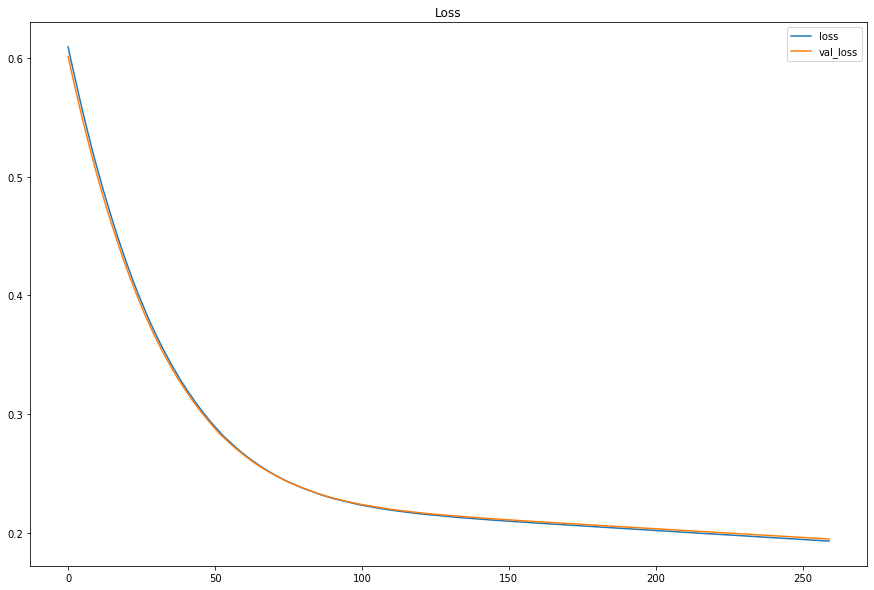

In [27]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title("Loss")
plt.legend(loc='best')
plt.show()

O gráfico abaixo mostra o que acontece com diferentes `learining rates`:

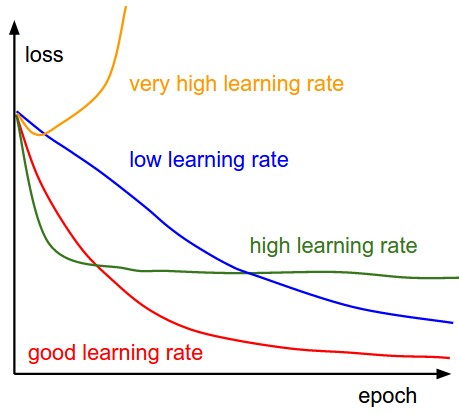

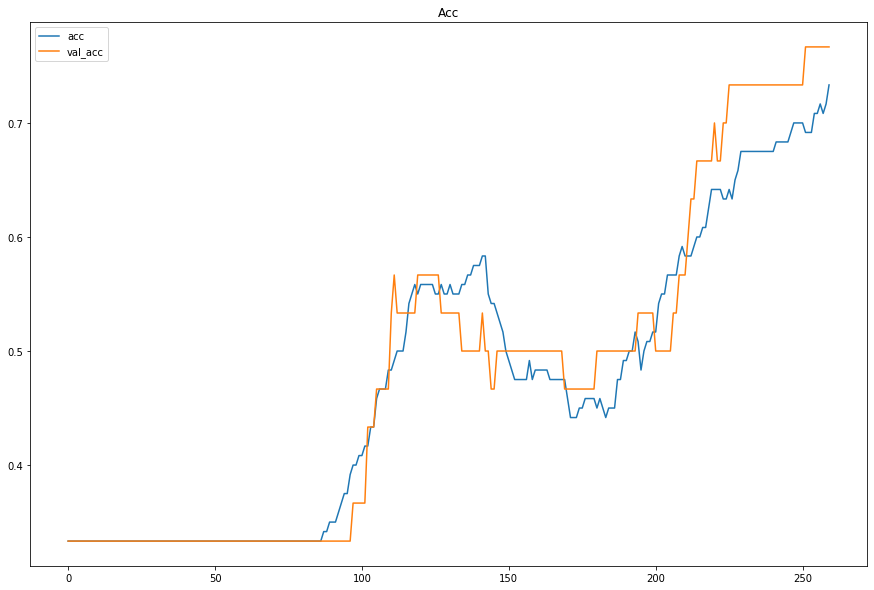

In [28]:
plt.figure(figsize = (15,10))


plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')

plt.title("Acc")
plt.legend(loc='best')
plt.show()

### Prevendo alguns exemplos

In [29]:
choseen_id = 0

In [30]:
print('Entrada: {}'.format(X_val[choseen_id]))
print('Saída esperada: {}'.format(y_val[choseen_id]))

Entrada: [0.30555556 0.70833333 0.08474576 0.04166667]
Saída esperada: [1 0 0]


In [31]:
prediction = model.predict(np.array([X_val[choseen_id]]))
prediction #prediction[0] nos dá a saída na forma (3,)

array([[0.40762582, 0.38086691, 0.2531671 ]], dtype=float32)

In [32]:
# Explicação do `np.argmax`: https://pt.stackoverflow.com/questions/362212/
def get_higher_value_id(prediction):
    return np.unravel_index(np.argmax(prediction, axis=None), prediction.shape)[0]

In [33]:
print('Classe prevista: {}'.format(get_higher_value_id(prediction[0])))
print('Classe esperada: {}'.format(get_higher_value_id(y_val[choseen_id])))

Classe prevista: 0
Classe esperada: 0


In [34]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def printa_softmax(categories, prediction):
    print('Probabilidades: ')
    for cat, percent in zip(categories, softmax(prediction[0])):
        print('{}: {:0.2f}%'.format(cat, percent*100))

In [35]:
softmax(prediction[0])

array([0.35329762, 0.3439691 , 0.30273327], dtype=float32)

In [36]:
printa_softmax(iris_dataset['target_names'],prediction)

Probabilidades: 
setosa: 35.33%
versicolor: 34.40%
virginica: 30.27%


In [37]:
def printa_previsao(id_to_predict, X, y, categories = iris_dataset['target_names']):
    print('Entrada: {}'.format(X[id_to_predict]))
    print('Esperado: {}, Classe: {}\n'.format(y[id_to_predict], categories[get_higher_value_id(y[id_to_predict])]))
    
    prediction = model.predict(np.array([X[id_to_predict]]))
    print('Previsão: {}, Classe: {}\n'.format(np.round(prediction[0], decimals=3), categories[get_higher_value_id(prediction[0])]))
    
    printa_softmax(categories, prediction)

In [38]:
printa_previsao(22, X_val, y_val)

Entrada: [0.47222222 0.41666667 0.6440678  0.70833333]
Esperado: [0 0 1], Classe: virginica

Previsão: [0.301 0.295 0.389], Classe: virginica

Probabilidades: 
setosa: 32.39%
versicolor: 32.22%
virginica: 35.38%


### Matriz de confusão
Uma explicação de o que é a Matriz de confusão pode ser encontrada [aqui](https://en.wikipedia.org/wiki/Confusion_matrix).

In [39]:
dict_confusion_matrix = {}
for entrada, saida in zip(X_val, y_val):
    prediction = model.predict(np.array([entrada]))
    
    classe_esperada = get_higher_value_id(saida)
    if classe_esperada not in dict_confusion_matrix.keys():
        dict_confusion_matrix.update({classe_esperada:[0,0,0]})

    classe_prevista = get_higher_value_id(prediction[0])
    dict_confusion_matrix[classe_esperada][classe_prevista] += 1
    

In [40]:
dict_confusion_matrix

{0: [10, 0, 0], 1: [0, 3, 7], 2: [0, 0, 10]}

In [41]:
def confusion_matrix(dict_confusion_matrix):
    
    print('Predicted: {}'.format('  '.join(map(str, dict_confusion_matrix.keys()))))
    print('Actual')
    for key, value in dict_confusion_matrix.items():
        print('  {}:       {}'.format(key, '  '.join(map(str, value))))

In [42]:
confusion_matrix(dict_confusion_matrix)

Predicted: 0  1  2
Actual
  0:       10  0  0
  1:       0  3  7
  2:       0  0  10


In [43]:
for key, value in dict_confusion_matrix.items():
    print('Classe: {}'.format(iris_dataset['target_names'][key]))
    total = sum(value)
    print('Acertos: {:0.2f}%'.format(value[key]/total * 100))
    print('Erros: {:0.2f}% \n'.format(100 - value[key]/total * 100))


Classe: setosa
Acertos: 100.00%
Erros: 0.00% 

Classe: versicolor
Acertos: 30.00%
Erros: 70.00% 

Classe: virginica
Acertos: 100.00%
Erros: 0.00% 



Uma maneira mais fácil de fazer a matriz é:

In [44]:
actual = []
predicted = []
for entrada, saida in zip(X_val, y_val):
    actual.append(get_higher_value_id(saida))
        
    prediction = model.predict(np.array([entrada]))
    predicted.append(get_higher_value_id(prediction[0]))

In [46]:
import pandas as pd
y_actu = pd.Series(actual, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

In [47]:
df_confusion

Predicted,0,1,2
Actual,,,
0,10,0,0
1,0,3,7
2,0,0,10


In [48]:
pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
Actual,,,,
0,10,0,0,10
1,0,3,7,10
2,0,0,10,10
All,10,3,17,30


In [49]:
df_confusion / df_confusion.sum(axis=1)

Predicted,0,1,2
Actual,,,
0,1.0,0.0,0.0
1,0.0,0.3,0.7
2,0.0,0.0,1.0


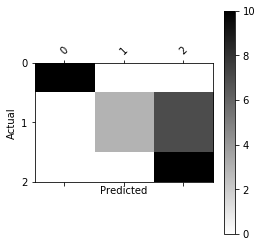

In [50]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

## Tarefa:
Sua missão, caso aceite, é variar os parametros do modelo, como número de épocas, número de camadas e de neurônios por camada. Tente melhorar a previsão (principalemnte da classe `versicolor`). Além disso, leam a documentação do Keras sobre:
- [Dense](https://keras.io/layers/core/)
- [Fit e Compile](https://keras.io/models/sequential/)
- [Exemplos de modelos](https://keras.io/getting-started/sequential-model-guide/)

___
## Multi input and Multi output model
Exemplo: https://www.pyimagesearch.com/2018/06/04/keras-multiple-outputs-and-multiple-losses/

In [ ]:
def Rede_Neural_Simples(num_entradas, num_saidas):
    data_input_1  = Input(shape=(num_entradas,)
                    , name='data_input')
    
    first_hidden_layer_1 = Dense(20, activation='sigmoid')(data_input_1)
    
    data_input_2  = Input(shape=(num_entradas,)
                    , name='data_input')
    
    first_hidden_layer_2 = Dense(20, activation='sigmoid')(data_input_2)
    
    merged = Concatenate([first_hidden_layer_1, first_hidden_layer_2])
    second_hidden_layer = Dense(20, activation='sigmoid')(merged)


    target_1 = Dense(num_saidas, name='sigmoid')(second_hidden_layer)
    target_2 = Dense(num_saidas, name='sigmoid')(second_hidden_layer)
    
    seq = Model(inputs=[data_input_1, data_input_2], outputs=[target_1, target_2], name='Rede_Neural_Simples')

    return seq

In [ ]:
# losses = {
    "category_output": "categorical_crossentropy",
    "color_output": "categorical_crossentropy",
}
 
# initialize the optimizer and compile the model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(optimizer=opt, loss=losses,
    metrics=["accuracy"])